In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('data/train_OldCustomer.csv', index_col='ID')
train_data.head(10)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard


In [85]:
train_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,89616.000000,8.961600e+04,89616.000000
mean,33.557267,48227.864585,4009.579609,5.261114,5.432557,14.061596,3.307088,19.088511,30.757688,9.939271,5.590430,1257.812572,32.256324,18.585297,87.343835,631.807008,-3.347616e+22,1.900487
std,10.843228,34957.331460,2909.495915,2.558153,2.023558,8.532318,2.314966,12.748844,227.000092,6.361531,3.768227,916.728750,5.083020,8.025948,81.372831,2046.186850,3.340318e+24,0.674353
min,14.000000,7005.930000,303.645417,-1.000000,0.500000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,-3.333333e+26,1.000000
25%,25.000000,19370.480000,1630.684167,3.000000,4.000000,7.000000,2.000000,9.000000,9.000000,5.190000,3.000000,543.950000,28.047795,13.000000,26.662099,74.048387,2.735820e+02,1.000000
50%,33.000000,36145.715000,3026.830876,5.000000,5.000000,12.000000,3.000000,17.000000,13.000000,9.180000,5.000000,1109.200000,32.270454,18.000000,61.168619,133.744359,3.401390e+02,2.000000
75%,42.000000,69324.200000,5758.890000,7.000000,7.000000,19.000000,5.000000,26.000000,18.000000,13.920000,8.000000,1698.060000,36.467798,25.000000,129.521669,257.281117,4.707722e+02,2.000000
max,56.000000,152574.760000,12901.420000,10.500000,11.000000,34.000000,9.000000,55.000000,4397.000000,36.970000,17.000000,4014.350000,47.937980,33.000000,357.406068,10000.000000,1.415565e+03,3.000000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

# EXPLORATORY DATA ANALYSIS

In [4]:
train_data.drop(columns=['SSN', 'Name'], axis=1, inplace=True)

In [5]:
# Categorical Cols
categorical_cols = [c for c in train_data.columns if train_data[c].dtype == 'object']

In [6]:
for col in categorical_cols:
    print(f"Unique Values of {col}")
    print(train_data[col].unique())
    print("==================================================")

Unique Values of Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1

In [7]:
for col in categorical_cols:
    train_data[col] = train_data[col].str.strip('_')

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]
        

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'':np.nan})

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})

In [8]:
train_data[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              100000 non-null  object 
 1   Month                    100000 non-null  object 
 2   Age                      100000 non-null  float64
 3   Occupation               92938 non-null   object 
 4   Annual_Income            100000 non-null  float64
 5   Num_of_Loan              100000 non-null  float64
 6   Type_of_Loan             88592 non-null   object 
 7   Num_of_Delayed_Payment   92998 non-null   float64
 8   Changed_Credit_Limit     97909 non-null   float64
 9   Credit_Mix               79805 non-null   object 
 10  Outstanding_Debt         100000 non-null  float64
 11  Credit_History_Age       90970 non-null   object 
 12  Payment_of_Min_Amount    100000 non-null  object 
 13  Amount_invested_monthly  95521 non-null   float64
 14  Pay

In [9]:
credit_age = []
for i in train_data['Credit_History_Age']:
    credit_age.append(str(i).split(' ')[0])
    
train_data['Credit_History_Age'] = credit_age

train_data['Credit_History_Age'] = train_data['Credit_History_Age'].replace({'nan':np.nan})
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].astype('float64')

In [10]:
numerical_cols = [col for col in train_data.columns if (train_data[col].dtype == 'int64') | (train_data[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(train_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_data.loc[train_data[x] < min,x] = np.nan
    train_data.loc[train_data[x] > max,x] = np.nan

In [11]:
train_data.drop(columns=['Type_of_Loan'], axis=1, inplace=True)

<AxesSubplot: >

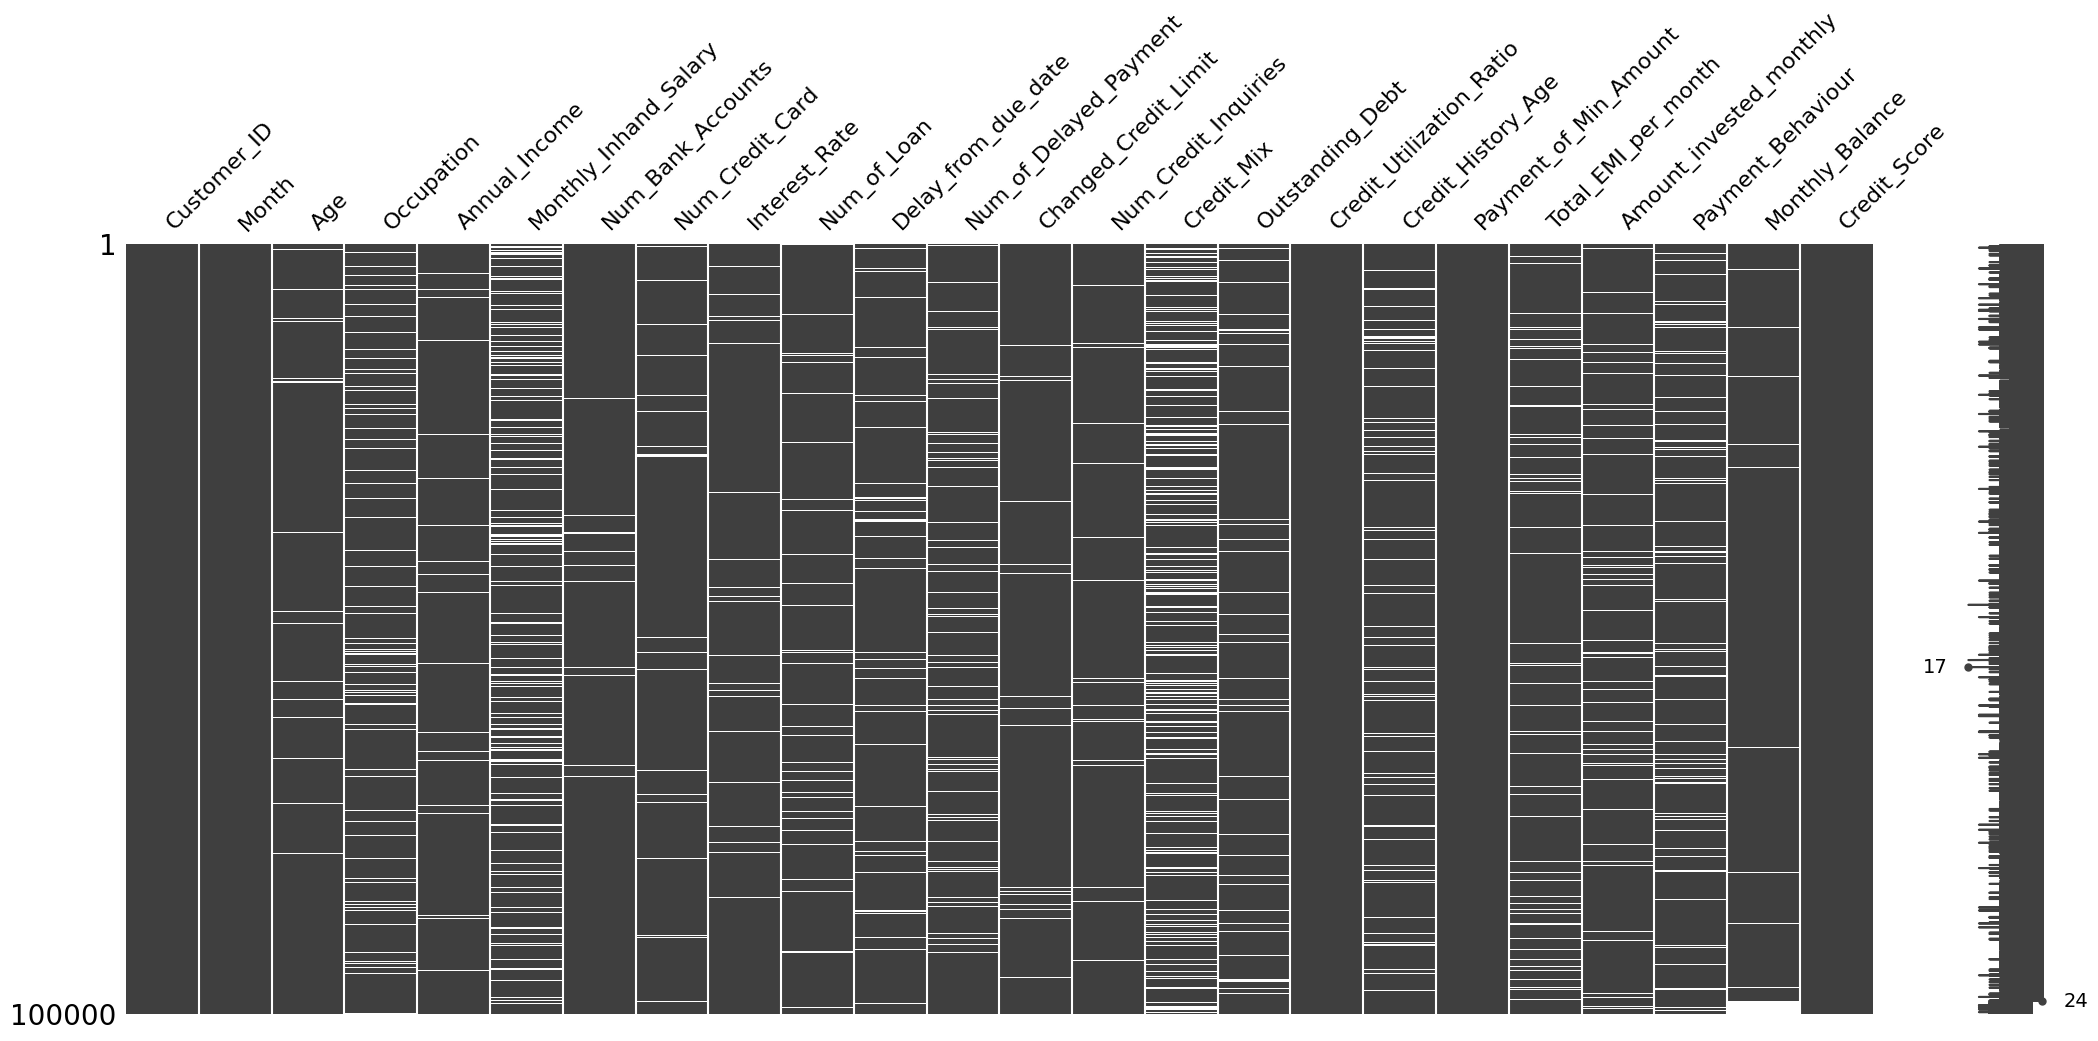

In [12]:
msno.matrix(train_data)

In [13]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Age                          2781
Occupation                   7062
Annual_Income                2783
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Delay_from_due_date          4002
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Total_EMI_per_month          6795
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
dtype: int64

In [14]:
missing_cols = [col for col in missing.index]
missing_cols.append('Customer_ID')
missing_cols

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Customer_ID']

In [15]:
missing_cols_set = set(missing_cols)
missing_cols_set

{'Age',
 'Amount_invested_monthly',
 'Annual_Income',
 'Changed_Credit_Limit',
 'Credit_History_Age',
 'Credit_Mix',
 'Credit_Utilization_Ratio',
 'Customer_ID',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Balance',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Num_of_Loan',
 'Occupation',
 'Outstanding_Debt',
 'Payment_Behaviour',
 'Total_EMI_per_month'}

In [16]:
# numerical cols with missing values
numerical_cols_set = {col for col in train_data.columns if (train_data[col].dtype=='int64') | (train_data[col].dtype=='float64')}
numerical_cols_missing = [col for col in numerical_cols_set.intersection(missing_cols_set)]
numerical_cols_missing.append('Customer_ID')

In [17]:
numerical_cols_missing

['Annual_Income',
 'Interest_Rate',
 'Num_Credit_Card',
 'Monthly_Balance',
 'Num_Credit_Inquiries',
 'Total_EMI_per_month',
 'Age',
 'Credit_Utilization_Ratio',
 'Num_of_Loan',
 'Changed_Credit_Limit',
 'Credit_History_Age',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Delay_from_due_date',
 'Monthly_Inhand_Salary',
 'Amount_invested_monthly',
 'Num_Bank_Accounts',
 'Customer_ID']

In [18]:
train_data[numerical_cols_missing].head(50)

,Annual_Income,Interest_Rate,Num_Credit_Card,Monthly_Balance,Num_Credit_Inquiries,Total_EMI_per_month,Age,Credit_Utilization_Ratio,Num_of_Loan,Changed_Credit_Limit,Credit_History_Age,Num_of_Delayed_Payment,Outstanding_Debt,Delay_from_due_date,Monthly_Inhand_Salary,Amount_invested_monthly,Num_Bank_Accounts,Customer_ID
ID,,,,,,,,,,,,,,,,,,
0x1602,19114.12,3.0,4.0,312.494089,4.0,49.574949,23.0,26.822620,4.0,11.27,22.0,7.0,809.98,3.0,1824.843333,80.415295,3.0,CUS_0xd40
0x1603,19114.12,3.0,4.0,284.629162,4.0,49.574949,23.0,31.944960,4.0,11.27,NaN,NaN,809.98,-1.0,NaN,118.280222,3.0,CUS_0xd40
0x1604,19114.12,3.0,4.0,331.209863,4.0,49.574949,NaN,28.609352,4.0,NaN,22.0,7.0,809.98,3.0,NaN,81.699521,3.0,CUS_0xd40
0x1605,19114.12,3.0,4.0,223.451310,4.0,49.574949,23.0,31.377862,4.0,6.27,22.0,4.0,809.98,5.0,NaN,199.458074,3.0,CUS_0xd40
0x1606,19114.12,3.0,4.0,341.489231,4.0,49.574949,23.0,24.797347,4.0,11.27,22.0,NaN,809.98,6.0,1824.843333,41.420153,3.0,CUS_0xd40
0x1607,19114.12,3.0,4.0,340.479212,4.0,49.574949,23.0,27.262259,4.0,9.27,22.0,4.0,809.98,8.0,NaN,62.430172,3.0,CUS_0xd40
0x1608,19114.12,3.0,4.0,244.565317,4.0,49.574949,23.0,22.537593,4.0,11.27,22.0,8.0,809.98,3.0,1824.843333,178.344067,3.0,CUS_0xd40
0x1609,19114.12,3.0,4.0,358.124168,4.0,49.574949,23.0,23.933795,4.0,11.27,NaN,6.0,809.98,3.0,1824.843333,24.785217,3.0,CUS_0xd40
0x160e,34847.84,6.0,4.0,470.690627,2.0,18.816215,28.0,24.464031,1.0,5.42,26.0,4.0,605.03,3.0,3037.986667,104.291825,2.0,CUS_0x21b1


In [19]:
numerical_cols_missing.pop()

'Customer_ID'

In [20]:
based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() == 1]
non_based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() != 1]

In [21]:
based_customer_ID, non_based_customer_ID

(['Age',
  'Annual_Income',
  'Monthly_Inhand_Salary',
  'Num_Bank_Accounts',
  'Num_Credit_Card',
  'Interest_Rate',
  'Num_of_Loan',
  'Num_Credit_Inquiries',
  'Outstanding_Debt',
  'Credit_History_Age',
  'Total_EMI_per_month'],
 ['Delay_from_due_date',
  'Num_of_Delayed_Payment',
  'Changed_Credit_Limit',
  'Credit_Utilization_Ratio',
  'Amount_invested_monthly',
  'Monthly_Balance'])

In [22]:
train_data[based_customer_ID] = train_data.groupby(by=['Customer_ID'])[based_customer_ID].transform('median')
train_data[non_based_customer_ID] = train_data[non_based_customer_ID].fillna(method='bfill')

In [23]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Occupation              7062
Annual_Income           1800
Credit_Mix             20195
Outstanding_Debt        5272
Total_EMI_per_month     2376
Payment_Behaviour       7600
Monthly_Balance         1696
dtype: int64

In [24]:
missing_cols_set = {col for col in missing.index}

In [25]:
categorical_cols_set = {col for col in train_data.columns if train_data[col].dtype == 'object'}
categorical_cols_set

{'Credit_Mix',
 'Credit_Score',
 'Customer_ID',
 'Month',
 'Occupation',
 'Payment_Behaviour',
 'Payment_of_Min_Amount'}

In [26]:
categorical_cols_missing = [col for col in categorical_cols_set.intersection(missing_cols_set)]
categorical_cols_missing

['Credit_Mix', 'Payment_Behaviour', 'Occupation']

In [27]:
train_data[categorical_cols_missing] = train_data[categorical_cols_missing].fillna(method='bfill')

<AxesSubplot: >

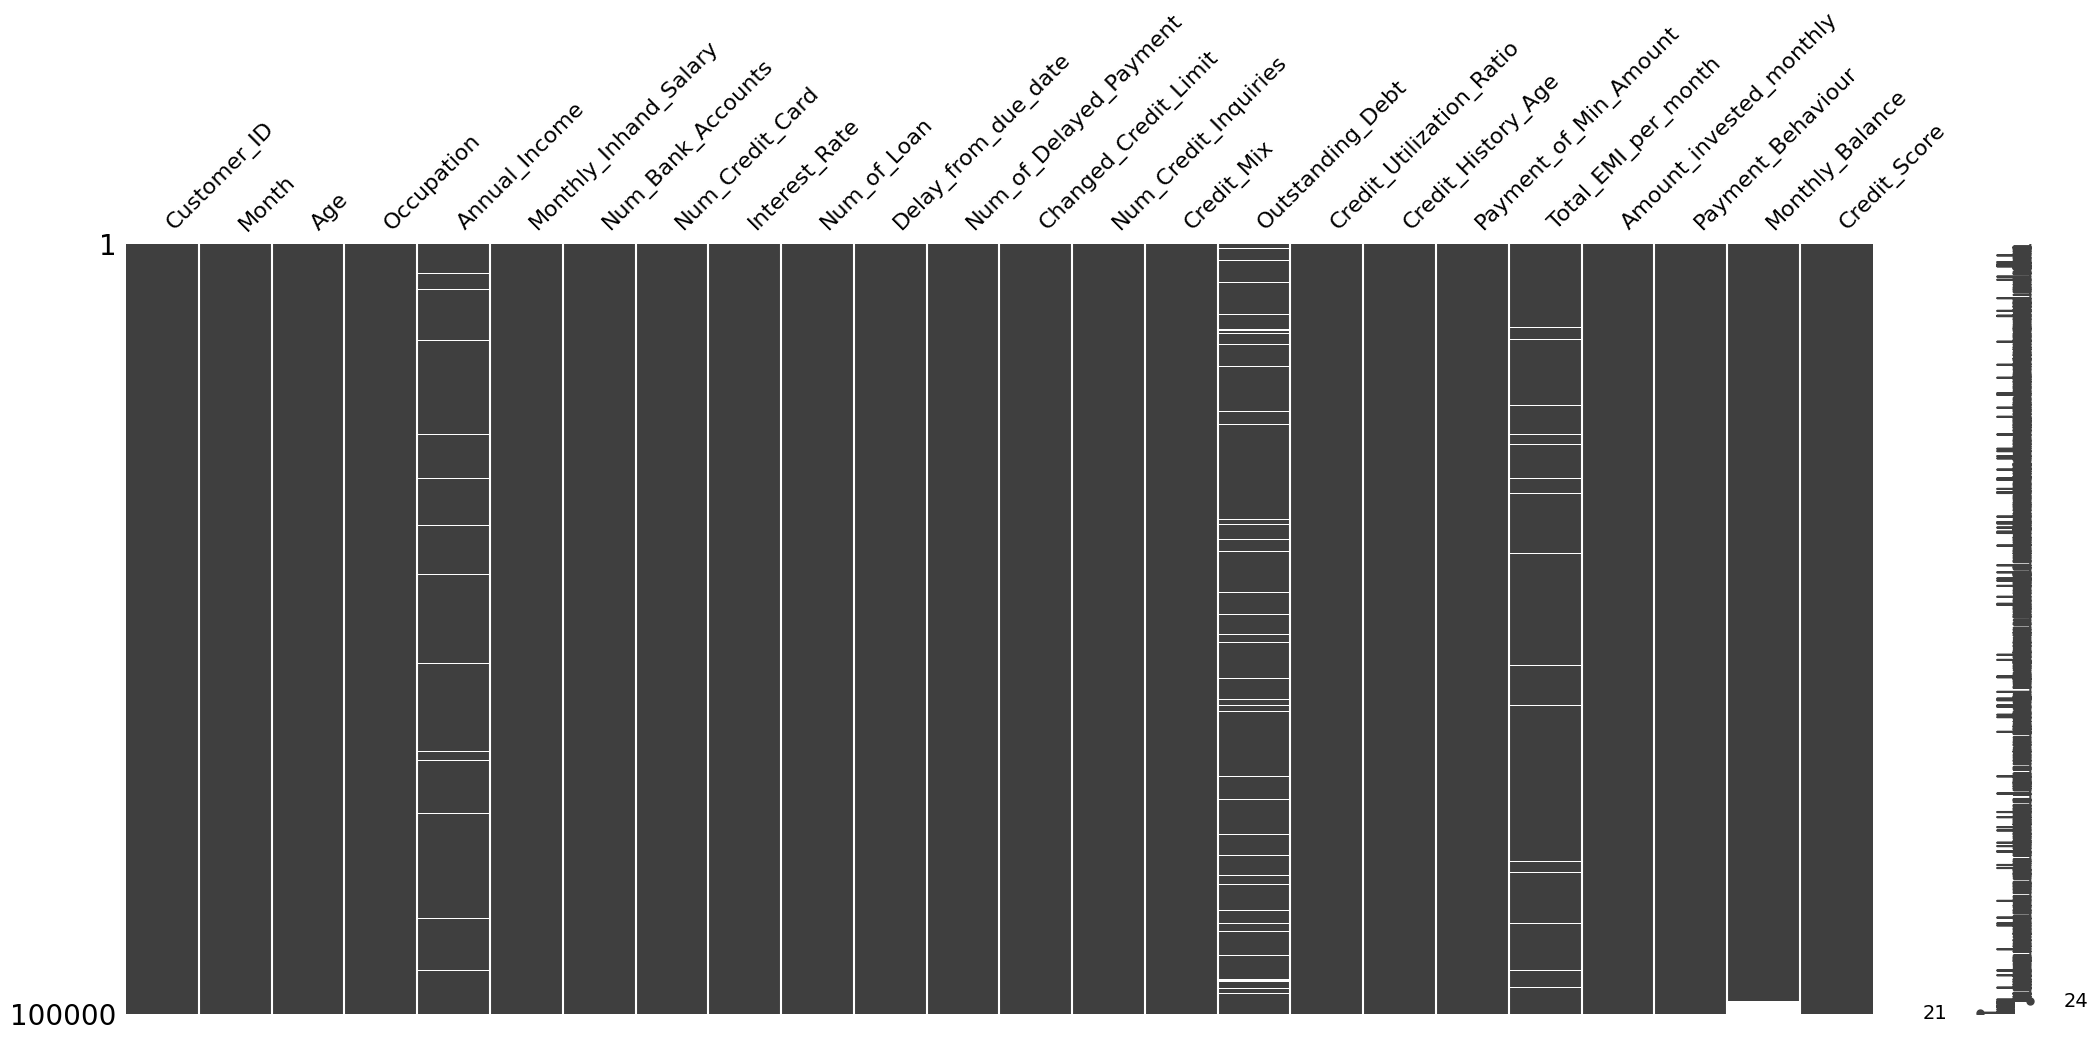

In [28]:
msno.matrix(train_data)

In [29]:
train_data.dropna(inplace=True)

In [30]:
train_data.drop(columns=['Customer_ID'], axis=1, inplace=True)

In [31]:
train_data['Credit_Score'] = train_data['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})

In [32]:
train_data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
0x1603,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,Good,809.98,31.944960,22.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3
0x1604,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3
0x1605,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
0x1606,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x255f9,April,38.0,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,9.0,...,Good,599.40,31.936092,25.0,NM,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,2
0x255fa,May,38.0,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,9.0,...,Good,599.40,26.268474,25.0,No,25.671257,76.057218,High_spent_Large_value_payments,453.567775,2
0x255fb,June,38.0,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,9.0,...,Good,599.40,28.754729,25.0,No,25.671257,91.198586,High_spent_Medium_value_payments,448.426407,2


In [33]:
clean_train_data = train_data.copy()

In [34]:
# Encode month manually
clean_train_data['Month'] = clean_train_data['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [35]:
y = clean_train_data['Credit_Score']
X = clean_train_data.drop(columns=['Credit_Score'], axis=1)

In [36]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_cols

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [37]:
low_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()<4)]
low_cardinality_categorical_cols

['Credit_Mix', 'Payment_of_Min_Amount']

In [38]:
high_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()>3)]

high_cardinality_categorical_cols

['Occupation', 'Payment_Behaviour']

In [39]:
OH_X = pd.get_dummies(X[low_cardinality_categorical_cols])
OH_X.head(15)

,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
ID,,,,,,
0x1602,0,1,0,0,1,0
0x1603,0,1,0,0,1,0
0x1604,0,1,0,0,1,0
0x1605,0,1,0,0,1,0
0x1606,0,1,0,0,1,0
0x1607,0,1,0,0,1,0
0x1608,0,1,0,0,1,0
0x1609,0,1,0,0,1,0
0x160e,0,1,0,0,1,0


In [40]:
ord_encoder = OrdinalEncoder()
ORD_X = pd.DataFrame(ord_encoder.fit_transform(X[high_cardinality_categorical_cols]), index=X[high_cardinality_categorical_cols].index, columns=X[high_cardinality_categorical_cols].columns)
ORD_X

,Occupation,Payment_Behaviour
ID,,
0x1602,12.0,2.0
0x1603,12.0,3.0
0x1604,12.0,4.0
0x1605,12.0,5.0
0x1606,12.0,1.0
...,...,...
0x255f9,7.0,5.0
0x255fa,7.0,0.0
0x255fb,7.0,1.0


In [41]:
categorical_X = ORD_X.join(OH_X)

In [42]:
# Numerical Cols
numerical_cols = [col for col in X.columns if 
                 (X[col].dtype == 'float64')|
                 (X[col].dtype == 'int64')]

In [43]:
X[numerical_cols].head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,
0x1602,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,22.0,49.574949,80.415295,312.494089
0x1603,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,4.0,809.98,31.944960,22.0,49.574949,118.280222,284.629162
0x1604,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,4.0,809.98,28.609352,22.0,49.574949,81.699521,331.209863
0x1605,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,22.0,49.574949,199.458074,223.451310
0x1606,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,22.0,49.574949,41.420153,341.489231


In [44]:
numerical_X = X[numerical_cols]

In [45]:
cols_for_scaled = ['Annual_Income', 
                   'Monthly_Inhand_Salary', 
                   'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 
                   'Credit_History_Age', 
                   'Total_EMI_per_month', 
                   'Amount_invested_monthly',
                   'Monthly_Balance']

scaler = MinMaxScaler()
numerical_scaled_X = pd.DataFrame(scaler.fit_transform(numerical_X[cols_for_scaled]), 
                                  index=numerical_X[cols_for_scaled].index, 
                                  columns=numerical_X[cols_for_scaled].columns)

In [46]:
numerical_X[cols_for_scaled] = numerical_scaled_X

In [47]:
numerical_X

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,
0x1602,1,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,0.201725,0.244206,0.666667,0.138708,0.008042,1.0
0x1603,2,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,4.0,0.201725,0.427553,0.666667,0.138708,0.011828,1.0
0x1604,3,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,6.27,4.0,0.201725,0.308159,0.666667,0.138708,0.008170,1.0
0x1605,4,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,0.201725,0.407254,0.666667,0.138708,0.019946,1.0
0x1606,5,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,0.201725,0.171714,0.666667,0.138708,0.004142,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x255f9,4,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,1.58,2.0,0.149266,0.427235,0.757576,0.071827,0.038754,1.0
0x255fa,5,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,1.58,2.0,0.149266,0.224371,0.757576,0.071827,0.007606,1.0
0x255fb,6,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,1.58,2.0,0.149266,0.313363,0.757576,0.071827,0.009120,1.0


In [48]:
Final_X = numerical_X.join(categorical_X)

In [49]:
y.value_counts()

2    47976
1    25279
3    16361
Name: Credit_Score, dtype: int64

In [50]:
Final_X

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Monthly_Balance,Occupation,Payment_Behaviour,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,1,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,...,0.008042,1.0,12.0,2.0,0,1,0,0,1,0
0x1603,2,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,-1.0,7.0,...,0.011828,1.0,12.0,3.0,0,1,0,0,1,0
0x1604,3,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,...,0.008170,1.0,12.0,4.0,0,1,0,0,1,0
0x1605,4,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,5.0,4.0,...,0.019946,1.0,12.0,5.0,0,1,0,0,1,0
0x1606,5,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,6.0,4.0,...,0.004142,1.0,12.0,1.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x255f9,4,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,...,0.038754,1.0,7.0,5.0,0,1,0,1,0,0
0x255fa,5,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,...,0.007606,1.0,7.0,0.0,0,1,0,0,1,0
0x255fb,6,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,...,0.009120,1.0,7.0,1.0,0,1,0,0,1,0


#

In [51]:
# Imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
Final_X, y = smote.fit_resample(Final_X,y)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Final_X,y,test_size=0.20,random_state=500)

# LOGISTIC CLASSIFIER

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred_train_lr=lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [57]:
lr.coef_

array([[-1.23323051e-01, -3.62313303e-02, -3.53111338e-02,
        -3.46868033e-02, -6.34821202e-02,  6.61694843e-02,
         3.86984343e-02,  5.28826034e-02,  2.80618983e-02,
        -4.95617834e-05, -3.29482986e-02,  1.29346829e-01,
         2.84913381e-02, -2.85534479e-02, -7.23319732e-02,
        -1.37050136e-02, -4.07523436e-03, -6.23143696e-02,
        -1.27534227e-03,  3.12397239e-03,  4.22612240e-02,
        -2.44713572e-02, -7.10897160e-02,  4.34085213e-03,
        -5.09266895e-02,  1.53827848e-02],
       [-1.64919049e-02,  7.39877536e-03, -8.90907969e-03,
        -8.16822792e-03,  9.31183853e-02,  4.09915599e-02,
        -5.93584554e-03, -4.67703513e-02,  3.69534560e-03,
         1.33996692e-05,  2.08513479e-02, -5.30826878e-02,
        -2.80107448e-02, -5.64410965e-03, -1.26304678e-02,
        -7.76364871e-03, -2.06914006e-04, -1.34515092e-02,
        -1.05128285e-02,  2.25491277e-03, -2.79355708e-02,
        -2.24420948e-01,  2.66474962e-01,  3.13536341e-02,
        -6.88

In [58]:
lr.intercept_

array([-0.0623433 , -0.01338965,  0.07573296])

In [59]:
print(confusion_matrix(y_train,y_pred_train_lr))
print('*'*20)
print(confusion_matrix(y_test,y_pred_test_lr))

[[10315  6736  3158]
 [ 5204 24654  8378]
 [  701  7609 30229]]
********************
[[2606 1664  800]
 [1325 6310 2105]
 [ 179 1847 7411]]


In [60]:
print(classification_report(y_train,y_pred_train_lr))
print('*'*20)
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

           1       0.64      0.51      0.57     20209
           2       0.63      0.64      0.64     38236
           3       0.72      0.78      0.75     38539

    accuracy                           0.67     96984
   macro avg       0.66      0.65      0.65     96984
weighted avg       0.67      0.67      0.67     96984

********************
              precision    recall  f1-score   support

           1       0.63      0.51      0.57      5070
           2       0.64      0.65      0.65      9740
           3       0.72      0.79      0.75      9437

    accuracy                           0.67     24247
   macro avg       0.66      0.65      0.65     24247
weighted avg       0.67      0.67      0.67     24247



In [61]:
print(accuracy_score(y_train, y_pred_train_lr))
print("\n")
print(accuracy_score(y_test, y_pred_test_lr))

0.67225521735544


0.6733616529879985


# DECISION TREE CLASSIFIER

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [64]:
y_pred_g_train=dt_gini.predict(x_train)
y_pred_g_test=dt_gini.predict(x_test)
y_pred_e_train=dt_entropy.predict(x_train)
y_pred_e_test=dt_entropy.predict(x_test)

In [65]:
print(classification_report(y_train,y_pred_g_train))
print("\n")
print(classification_report(y_test,y_pred_g_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20209
           2       1.00      1.00      1.00     38236
           3       1.00      1.00      1.00     38539

    accuracy                           1.00     96984
   macro avg       1.00      1.00      1.00     96984
weighted avg       1.00      1.00      1.00     96984



              precision    recall  f1-score   support

           1       0.68      0.67      0.68      5070
           2       0.74      0.74      0.74      9740
           3       0.85      0.86      0.85      9437

    accuracy                           0.77     24247
   macro avg       0.76      0.75      0.76     24247
weighted avg       0.77      0.77      0.77     24247



In [66]:
print(accuracy_score(y_train,y_pred_g_train))
print("\n")
print(accuracy_score(y_test,y_pred_g_test))
print("\n")
print(accuracy_score(y_train,y_pred_e_train))
print("\n")
print(accuracy_score(y_test,y_pred_e_test))

1.0


0.7697859529013898


1.0


0.7785293025941353


In [67]:
from sklearn.model_selection import cross_val_score
accuracy_train_gini=cross_val_score(dt_gini,X=x_train,y=y_train,cv=15)
accuracy_test_gini=cross_val_score(dt_gini,X=x_test,y=y_test,cv=15)
print(accuracy_train_gini)
print('\n')
print(accuracy_test_gini)

[0.76152181 0.77513146 0.76631612 0.76260439 0.75920198 0.76074853
 0.76384163 0.76909991 0.75889267 0.76349575 0.76736272 0.7638051
 0.76133024 0.76334107 0.77324053]


[0.73902288 0.69758813 0.70995671 0.72418058 0.71923315 0.70995671
 0.71861472 0.71720297 0.71039604 0.71225248 0.73638614 0.72153465
 0.7085396  0.72153465 0.71782178]


In [68]:
from sklearn.model_selection import cross_val_score
accuracy_train_entropy=cross_val_score(dt_entropy,X=x_train,y=y_train,cv=15)
accuracy_test_entropy=cross_val_score(dt_entropy,X=x_test,y=y_test,cv=15)
print(accuracy_train_entropy)
print('\n')
print(accuracy_test_entropy)

[0.7673987  0.76786267 0.77002784 0.77234766 0.76708939 0.76507887
 0.77281163 0.77018249 0.76090319 0.76674401 0.76983759 0.76210363
 0.76597061 0.77385924 0.77540603]


[0.74397032 0.72541744 0.71799629 0.71675943 0.70871985 0.70191713
 0.72418058 0.73886139 0.72153465 0.71534653 0.71967822 0.71905941
 0.70668317 0.71472772 0.71782178]


# RANDOM FOREST CLASSIFIER

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500,criterion='gini')
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [70]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [71]:
print(classification_report(y_train, y_pred_rf_train))
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20209
           2       1.00      1.00      1.00     38236
           3       1.00      1.00      1.00     38539

    accuracy                           1.00     96984
   macro avg       1.00      1.00      1.00     96984
weighted avg       1.00      1.00      1.00     96984

              precision    recall  f1-score   support

           1       0.81      0.82      0.82      5070
           2       0.88      0.79      0.83      9740
           3       0.88      0.96      0.92      9437

    accuracy                           0.86     24247
   macro avg       0.86      0.86      0.86     24247
weighted avg       0.86      0.86      0.86     24247



In [72]:
print(accuracy_score(y_train, y_pred_rf_train))
print("\n")
print(accuracy_score(y_test, y_pred_rf_test))

1.0


0.8641068998226584


In [73]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(rf_model, X=x_test, y=y_test, cv = 20)
print(accuracy_test)

[0.81121187 0.8219291  0.81368508 0.79884584 0.81203627 0.79637263
 0.8227535  0.78382838 0.79620462 0.81023102 0.77805281 0.81683168
 0.80610561 0.80610561 0.81270627 0.81848185 0.8160066  0.80775578
 0.80528053 0.80775578]


# KNN CLASSIFIER

In [74]:
x_knn=Final_X

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_knn)
scaled_features=scaler.transform(x_knn)

In [76]:
df_feat=pd.DataFrame(scaled_features,columns=x_knn.columns)
df_feat

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Monthly_Balance,Occupation,Payment_Behaviour,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-1.542186,-1.031505,-0.898561,-0.817018,-0.691751,-0.537126,-1.138552,0.454299,-1.139391,-0.099665,...,-0.284949,0.010147,1.184629,-0.381572,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
1,-1.092278,-1.031505,-0.898561,-0.817018,-0.691751,-0.537126,-1.138552,0.454299,-1.466562,-0.099665,...,-0.265460,0.010147,1.184629,0.176126,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
2,-0.642369,-1.031505,-0.898561,-0.817018,-0.691751,-0.537126,-1.138552,0.454299,-1.139391,-0.099665,...,-0.284288,0.010147,1.184629,0.733823,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
3,-0.192461,-1.031505,-0.898561,-0.817018,-0.691751,-0.537126,-1.138552,0.454299,-0.975806,-0.113068,...,-0.223677,0.010147,1.184629,1.291521,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
4,0.257447,-1.031505,-0.898561,-0.817018,-0.691751,-0.537126,-1.138552,0.454299,-0.894013,-0.113068,...,-0.305020,0.010147,1.184629,-0.939269,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121226,-0.642369,-0.121535,-0.261087,-0.198572,-1.854115,0.938241,-1.016923,-0.457102,-0.730428,-0.090887,...,-0.141383,0.010147,-0.686569,0.753312,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
121227,-1.542186,1.503319,-0.276607,-0.300066,-0.663876,0.025424,-0.061393,-0.945588,-1.063483,-0.081796,...,-0.287617,0.010147,1.001211,-0.979391,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
121228,-1.092278,1.834902,0.815363,0.816420,-0.691751,-2.012493,-1.260181,0.454299,-0.989065,-0.082882,...,-0.229180,0.010147,1.652428,-0.803653,-0.418416,1.134512,-0.81015,-0.320173,1.106628,-0.810848
121229,0.257447,0.242453,0.801209,0.807312,0.083159,-0.045337,0.320994,0.454299,0.741842,-0.088250,...,-0.174539,0.010147,-1.622168,-0.752823,-0.418416,-0.881436,1.23434,-0.320173,-0.903646,1.233277


In [77]:
x_knn= df_feat

In [78]:
from sklearn.model_selection import train_test_split
x_train_knn,x_test_knn,y_train,y_test=train_test_split(x_knn,y,train_size=0.75,random_state=555)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_knn,y_train)

KNeighborsClassifier(n_neighbors=10)

In [81]:
y_pred_knn_train=knn.predict(x_train_knn)
y_pred_knn_test=knn.predict(x_test_knn)

In [82]:
print(confusion_matrix(y_train,y_pred_knn_train))
print("\n")
print(confusion_matrix(y_test,y_pred_knn_test))

[[13963  2906  2133]
 [ 3843 26992  5174]
 [  131  2191 33590]]


[[ 4288  1214   775]
 [ 1460  8361  2146]
 [   62   990 11012]]


In [83]:
print(classification_report(y_train,y_pred_knn_train))
print("\n")
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           1       0.78      0.73      0.76     19002
           2       0.84      0.75      0.79     36009
           3       0.82      0.94      0.87     35912

    accuracy                           0.82     90923
   macro avg       0.81      0.81      0.81     90923
weighted avg       0.82      0.82      0.82     90923



              precision    recall  f1-score   support

           1       0.74      0.68      0.71      6277
           2       0.79      0.70      0.74     11967
           3       0.79      0.91      0.85     12064

    accuracy                           0.78     30308
   macro avg       0.77      0.76      0.77     30308
weighted avg       0.78      0.78      0.78     30308



In [84]:
print(accuracy_score(y_train,y_pred_knn_train))
print("\n")
print(accuracy_score(y_test,y_pred_knn_test))

0.8198695599573266


0.7806849676653029
